In [30]:
import pandas as pd
import numpy as np
import os

In [31]:
def read_data(file_path):
    r"""
    Read the data from the file path
    :param file_path: path to the file
    :return: data
    """
    data = pd.read_csv(file_path)
    return data


In [32]:

file_path = '/home/snow/NEU/StableDiffusion-PyTorch/data/debiased_galaxy.csv'
data = read_data(file_path)

In [33]:
data_mapping = read_data('/home/snow/NEU/StableDiffusion-PyTorch/data/gz2_filename_mapping.csv')

In [34]:
data

,dr7objid,ra,dec,rastring,decstring,sample,gz2_class,total_classifications,total_votes,t01_smooth_or_features_a01_smooth_count,...,t11_arms_number_a36_more_than_4_fraction,t11_arms_number_a36_more_than_4_weighted_fraction,t11_arms_number_a36_more_than_4_debiased,t11_arms_number_a36_more_than_4_flag,t11_arms_number_a37_cant_tell_count,t11_arms_number_a37_cant_tell_weight,t11_arms_number_a37_cant_tell_fraction,t11_arms_number_a37_cant_tell_weighted_fraction,t11_arms_number_a37_cant_tell_debiased,t11_arms_number_a37_cant_tell_flag
0,587732591714893851,179.042984,60.522518,11:56:10.32,+60:31:21.1,original,Sc+t,45,342,0,...,0.450,0.450,0.482646,0,16,16.0,0.400,0.400,0.394506,0
1,588009368545984617,135.084396,52.494240,09:00:20.26,+52:29:39.3,original,Sb+t,42,332,1,...,0.512,0.503,0.504833,0,13,13.0,0.317,0.323,0.322743,0
2,587732484359913515,183.371979,50.741508,12:13:29.27,+50:44:29.4,original,Ei,36,125,28,...,0.000,0.000,0.000000,0,0,0.0,0.000,0.000,0.000000,0
3,587741723357282317,186.251953,28.558598,12:25:00.47,+28:33:31.0,original,Sc+t,28,218,1,...,0.240,0.240,0.241322,0,6,6.0,0.240,0.240,0.239765,0
4,587738410866966577,161.086395,14.084465,10:44:20.73,+14:05:04.1,original,Er,43,151,33,...,0.000,0.000,0.000000,0,0,0.0,0.000,0.000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239690,587741490371625059,167.542648,28.991867,11:10:10.23,+28:59:30.7,extra,Ec,42,135,34,...,0.000,0.000,0.000000,0,0,0.0,0.000,0.000,0.000000,0
239691,587731174917669027,316.108826,1.214799,21:04:26.12,+01:12:53.3,stripe82,Ei(i),46,186,25,...,0.000,0.000,0.000000,0,0,0.0,0.000,0.000,0.000000,0
239692,587731512070177108,21.690212,-0.546427,01:26:45.65,+00:32:47.1,stripe82,Ei,48,164,36,...,0.000,0.000,0.000000,0,2,2.0,1.000,1.000,1.000000,1
239693,587731513145688256,25.747143,0.360079,01:42:59.31,+00:21:36.3,stripe82,Ei(i),48,204,25,...,0.000,0.000,0.000000,0,0,0.0,0.000,0.000,0.000000,0


In [35]:
data = data.merge(data_mapping, left_on='dr7objid', right_on='objid', how='left')


In [36]:
data.dropna(inplace=True)

In [37]:
data

,dr7objid,ra,dec,rastring,decstring,sample_x,gz2_class,total_classifications,total_votes,t01_smooth_or_features_a01_smooth_count,...,t11_arms_number_a36_more_than_4_flag,t11_arms_number_a37_cant_tell_count,t11_arms_number_a37_cant_tell_weight,t11_arms_number_a37_cant_tell_fraction,t11_arms_number_a37_cant_tell_weighted_fraction,t11_arms_number_a37_cant_tell_debiased,t11_arms_number_a37_cant_tell_flag,objid,sample_y,asset_id
0,587732591714893851,179.042984,60.522518,11:56:10.32,+60:31:21.1,original,Sc+t,45,342,0,...,0,16,16.0,0.400,0.400,0.394506,0,587732591714893851,original,58957
1,588009368545984617,135.084396,52.494240,09:00:20.26,+52:29:39.3,original,Sb+t,42,332,1,...,0,13,13.0,0.317,0.323,0.322743,0,588009368545984617,original,193641
2,587732484359913515,183.371979,50.741508,12:13:29.27,+50:44:29.4,original,Ei,36,125,28,...,0,0,0.0,0.000,0.000,0.000000,0,587732484359913515,original,55934
3,587741723357282317,186.251953,28.558598,12:25:00.47,+28:33:31.0,original,Sc+t,28,218,1,...,0,6,6.0,0.240,0.240,0.239765,0,587741723357282317,original,158501
4,587738410866966577,161.086395,14.084465,10:44:20.73,+14:05:04.1,original,Er,43,151,33,...,0,0,0.0,0.000,0.000,0.000000,0,587738410866966577,original,110939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239690,587741490371625059,167.542648,28.991867,11:10:10.23,+28:59:30.7,extra,Ec,42,135,34,...,0,0,0.0,0.000,0.000,0.000000,0,587741490371625059,extra,262969
239691,587731174917669027,316.108826,1.214799,21:04:26.12,+01:12:53.3,stripe82,Ei(i),46,186,25,...,0,0,0.0,0.000,0.000,0.000000,0,587731174917669027,stripe82,275883
239692,587731512070177108,21.690212,-0.546427,01:26:45.65,+00:32:47.1,stripe82,Ei,48,164,36,...,0,2,2.0,1.000,1.000,1.000000,1,587731512070177108,stripe82,282536
239693,587731513145688256,25.747143,0.360079,01:42:59.31,+00:21:36.3,stripe82,Ei(i),48,204,25,...,0,0,0.0,0.000,0.000,0.000000,0,587731513145688256,stripe82,284172


<Axes: xlabel='gz2_class'>

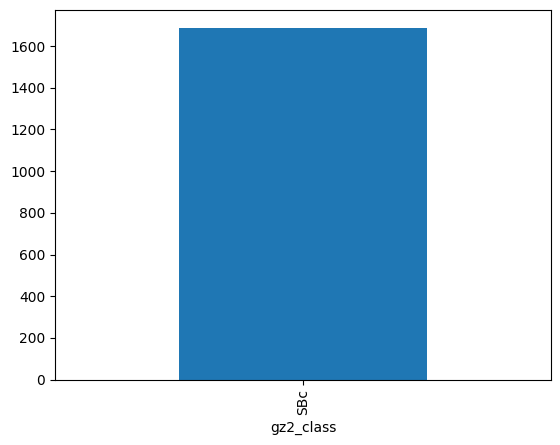

In [38]:
data[data['gz2_class'] == 'SBc']['gz2_class'].value_counts().plot(kind='bar')


In [39]:
data

,dr7objid,ra,dec,rastring,decstring,sample_x,gz2_class,total_classifications,total_votes,t01_smooth_or_features_a01_smooth_count,...,t11_arms_number_a36_more_than_4_flag,t11_arms_number_a37_cant_tell_count,t11_arms_number_a37_cant_tell_weight,t11_arms_number_a37_cant_tell_fraction,t11_arms_number_a37_cant_tell_weighted_fraction,t11_arms_number_a37_cant_tell_debiased,t11_arms_number_a37_cant_tell_flag,objid,sample_y,asset_id
0,587732591714893851,179.042984,60.522518,11:56:10.32,+60:31:21.1,original,Sc+t,45,342,0,...,0,16,16.0,0.400,0.400,0.394506,0,587732591714893851,original,58957
1,588009368545984617,135.084396,52.494240,09:00:20.26,+52:29:39.3,original,Sb+t,42,332,1,...,0,13,13.0,0.317,0.323,0.322743,0,588009368545984617,original,193641
2,587732484359913515,183.371979,50.741508,12:13:29.27,+50:44:29.4,original,Ei,36,125,28,...,0,0,0.0,0.000,0.000,0.000000,0,587732484359913515,original,55934
3,587741723357282317,186.251953,28.558598,12:25:00.47,+28:33:31.0,original,Sc+t,28,218,1,...,0,6,6.0,0.240,0.240,0.239765,0,587741723357282317,original,158501
4,587738410866966577,161.086395,14.084465,10:44:20.73,+14:05:04.1,original,Er,43,151,33,...,0,0,0.0,0.000,0.000,0.000000,0,587738410866966577,original,110939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239690,587741490371625059,167.542648,28.991867,11:10:10.23,+28:59:30.7,extra,Ec,42,135,34,...,0,0,0.0,0.000,0.000,0.000000,0,587741490371625059,extra,262969
239691,587731174917669027,316.108826,1.214799,21:04:26.12,+01:12:53.3,stripe82,Ei(i),46,186,25,...,0,0,0.0,0.000,0.000,0.000000,0,587731174917669027,stripe82,275883
239692,587731512070177108,21.690212,-0.546427,01:26:45.65,+00:32:47.1,stripe82,Ei,48,164,36,...,0,2,2.0,1.000,1.000,1.000000,1,587731512070177108,stripe82,282536
239693,587731513145688256,25.747143,0.360079,01:42:59.31,+00:21:36.3,stripe82,Ei(i),48,204,25,...,0,0,0.0,0.000,0.000,0.000000,0,587731513145688256,stripe82,284172


In [40]:
columns = ['asset_id', 't01_smooth_or_features_a01_smooth_debiased', 't02_edgeon_a05_no_debiased', 't04_spiral_a08_spiral_debiased', 't03_bar_a06_bar_debiased', 't03_bar_a07_no_bar_debiased', 't08_odd_feature_a38_dust_lane_debiased']

In [41]:
data = data[columns]

In [42]:
data.columns

Index(['asset_id', 't01_smooth_or_features_a01_smooth_debiased',
       't02_edgeon_a05_no_debiased', 't04_spiral_a08_spiral_debiased',
       't03_bar_a06_bar_debiased', 't03_bar_a07_no_bar_debiased',
       't08_odd_feature_a38_dust_lane_debiased'],
      dtype='object')

In [43]:
data

,asset_id,t01_smooth_or_features_a01_smooth_debiased,t02_edgeon_a05_no_debiased,t04_spiral_a08_spiral_debiased,t03_bar_a06_bar_debiased,t03_bar_a07_no_bar_debiased,t08_odd_feature_a38_dust_lane_debiased
0,58957,0.000,0.953848,1.000000,0.025,0.975305,0.0
1,193641,0.024,1.000000,1.000000,0.080,0.920038,0.0
2,55934,0.780,1.000000,0.000000,0.400,0.600190,0.0
3,158501,0.036,0.963112,0.962366,0.038,0.962028,0.0
4,110939,0.767,0.878825,0.000000,0.000,1.000000,0.0
...,...,...,...,...,...,...,...
239690,262969,0.823,0.143000,0.000000,0.000,1.000000,0.0
239691,275883,0.541,1.000000,0.000000,0.000,1.000000,0.0
239692,282536,0.789,1.000000,0.286000,0.143,0.857000,0.0
239693,284172,0.531,1.000000,0.076000,0.000,1.000000,0.0


In [44]:
condition = (data['t01_smooth_or_features_a01_smooth_debiased'] > 0.8) & (data['t03_bar_a07_no_bar_debiased'] > 0.6)

data['elliptical'] = np.where(condition, True, False)


/tmp/ipykernel_12701/3926765092.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['elliptical'] = np.where(condition, True, False)


In [45]:
data

,asset_id,t01_smooth_or_features_a01_smooth_debiased,t02_edgeon_a05_no_debiased,t04_spiral_a08_spiral_debiased,t03_bar_a06_bar_debiased,t03_bar_a07_no_bar_debiased,t08_odd_feature_a38_dust_lane_debiased,elliptical
0,58957,0.000,0.953848,1.000000,0.025,0.975305,0.0,False
1,193641,0.024,1.000000,1.000000,0.080,0.920038,0.0,False
2,55934,0.780,1.000000,0.000000,0.400,0.600190,0.0,False
3,158501,0.036,0.963112,0.962366,0.038,0.962028,0.0,False
4,110939,0.767,0.878825,0.000000,0.000,1.000000,0.0,False
...,...,...,...,...,...,...,...,...
239690,262969,0.823,0.143000,0.000000,0.000,1.000000,0.0,True
239691,275883,0.541,1.000000,0.000000,0.000,1.000000,0.0,False
239692,282536,0.789,1.000000,0.286000,0.143,0.857000,0.0,False
239693,284172,0.531,1.000000,0.076000,0.000,1.000000,0.0,False


In [46]:
data.elliptical.value_counts()

elliptical
False    196651
True      42738
Name: count, dtype: int64

In [47]:
condition = (data['t02_edgeon_a05_no_debiased']> 0.6) & (data['t04_spiral_a08_spiral_debiased'] > 0.7) & (data['t03_bar_a06_bar_debiased'] > 0.6)

data['barred_spiral'] = np.where(condition, True, False)


/tmp/ipykernel_12701/3857014826.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['barred_spiral'] = np.where(condition, True, False)


In [48]:
condition = (data['t02_edgeon_a05_no_debiased']> 0.6) & (data['t04_spiral_a08_spiral_debiased'] > 0.7) & (data['t03_bar_a07_no_bar_debiased'] > 0.6)

data['spiral'] = np.where(condition, True, False)

/tmp/ipykernel_12701/2210110765.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['spiral'] = np.where(condition, True, False)


In [49]:
data

,asset_id,t01_smooth_or_features_a01_smooth_debiased,t02_edgeon_a05_no_debiased,t04_spiral_a08_spiral_debiased,t03_bar_a06_bar_debiased,t03_bar_a07_no_bar_debiased,t08_odd_feature_a38_dust_lane_debiased,elliptical,barred_spiral,spiral
0,58957,0.000,0.953848,1.000000,0.025,0.975305,0.0,False,False,True
1,193641,0.024,1.000000,1.000000,0.080,0.920038,0.0,False,False,True
2,55934,0.780,1.000000,0.000000,0.400,0.600190,0.0,False,False,False
3,158501,0.036,0.963112,0.962366,0.038,0.962028,0.0,False,False,True
4,110939,0.767,0.878825,0.000000,0.000,1.000000,0.0,False,False,False
...,...,...,...,...,...,...,...,...,...,...
239690,262969,0.823,0.143000,0.000000,0.000,1.000000,0.0,True,False,False
239691,275883,0.541,1.000000,0.000000,0.000,1.000000,0.0,False,False,False
239692,282536,0.789,1.000000,0.286000,0.143,0.857000,0.0,False,False,False
239693,284172,0.531,1.000000,0.076000,0.000,1.000000,0.0,False,False,False


In [50]:
data.elliptical.value_counts()

elliptical
False    196651
True      42738
Name: count, dtype: int64

In [51]:
data.spiral.value_counts()

spiral
False    185113
True      54276
Name: count, dtype: int64

In [52]:
data.barred_spiral.value_counts()

barred_spiral
False    206772
True      32617
Name: count, dtype: int64

In [53]:
no_class_values = data[(data['spiral'] == False) & (data['barred_spiral'] == False) & (data['elliptical'] == False)].shape[0]
print(no_class_values)

116001


In [54]:
num_values = data[(data['spiral'] == True) & (data['barred_spiral'] == True)].shape[0]
print(num_values)

0


In [55]:
num_values = data[(data['elliptical'] == True) & (data['barred_spiral'] == True)].shape[0]
print(num_values)

0


In [56]:
num_values = data[(data['elliptical'] == True) & (data['spiral'] == True)].shape[0]
print(num_values)

6243


In [57]:
data.shape

(239389, 10)

In [58]:
import os

# Specify the folder path
folder_path = "/home/snow/NEU/StableDiffusion-PyTorch/data/images"

# Get the list of files in the folder
files = os.listdir(folder_path)

# Get the number of files
num_files = len(files)

print(f"The number of files in the folder '{folder_path}' is: {num_files}")

The number of files in the folder '/home/snow/NEU/StableDiffusion-PyTorch/data/images' is: 3


In [63]:
from PIL import Image

def image_class(df, image_id):
    r"""
    Read the image and its class
    :return: image and class
    """
    folder_path = "/home/snow/NEU/StableDiffusion-PyTorch/data/images/2"
    image = Image.open(folder_path + str(image_id) + ".jpg")

    image_class = None

    if df[df['asset_id'] == image_id]['elliptical'].values[0] == True:
        image_class = "Elliptical"
    elif df[df['asset_id'] == image_id]['spiral'].values[0] == True:
        image_class = "Spiral"
    elif df[df['asset_id'] == image_id]['barred_spiral'].values[0] == True:
        image_class = "Barred Spiral"

    print(image_class)
    return image

In [34]:
data[data['elliptical'] == True].shape[0] + data[data['spiral'] == True].shape[0] + data[data['barred_spiral'] == True].shape[0]

129631

In [35]:
drop_indices = data[(data['elliptical'] == False) & (data['spiral'] == False) & (data['barred_spiral'] == False)].index

In [36]:
data.drop(drop_indices, inplace=True)

/tmp/ipykernel_8939/1466107625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(drop_indices, inplace=True)


In [37]:
data.shape

(123388, 10)

In [90]:
import os
import shutil
import pandas as pd

def organize_spiral_images(data, images_folder):
    """
    Organizes the images with Spiral == True into a separate "spiral" folder.

    Args:
        data (pandas.DataFrame): The DataFrame containing the data.
        images_folder (str): The path to the folder containing the images.
    """
    # Create the spiral folder if it doesn't exist
    spiral_folder = os.path.join(images_folder, "elliptical")
    os.makedirs(spiral_folder, exist_ok=True)

    # Iterate over the rows in the DataFrame
    for _, row in data.iterrows():
        if row["elliptical"]:
            # Get the asset_id for the current row
            asset_id = row["asset_id"]

            # Construct the source and destination paths
            src_path = os.path.join(images_folder, f"{asset_id}.jpg")
            dst_path = os.path.join(spiral_folder, f"{asset_id}.jpg")

            # Check if the source file exists
            if os.path.exists(src_path):
                # Move the file to the spiral folder
                shutil.move(src_path, dst_path)
            else:
                print(f"Image not found for asset_id: {asset_id}")

In [91]:
organize_spiral_images(data, '/home/snow/NEU/StableDiffusion-PyTorch/data/images/')

Image not found for asset_id: 196218
Image not found for asset_id: 227093
Image not found for asset_id: 134382
Image not found for asset_id: 31217
Image not found for asset_id: 227926
Image not found for asset_id: 125799
Image not found for asset_id: 81512
Image not found for asset_id: 169928
Image not found for asset_id: 129997
Image not found for asset_id: 184481
Image not found for asset_id: 176296
Image not found for asset_id: 33683
Image not found for asset_id: 136139
Image not found for asset_id: 200673
Image not found for asset_id: 19905
Image not found for asset_id: 56978
Image not found for asset_id: 31214
Image not found for asset_id: 213127
Image not found for asset_id: 200945
Image not found for asset_id: 69505
Image not found for asset_id: 214803
Image not found for asset_id: 3228
Image not found for asset_id: 232869
Image not found for asset_id: 157350
Image not found for asset_id: 188600
Image not found for asset_id: 238600
Image not found for asset_id: 43712
Image not f

In [92]:
import os

def count_images(folder_path):
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif']  # Add more extensions if needed
    image_count = 0

    # Iterate over the files in the folder
    for file_name in os.listdir(folder_path):
        # Check if the file has an image extension
        if os.path.splitext(file_name)[1].lower() in image_extensions:
            image_count += 1

    return image_count

# Specify the folder path
folder_path = "/home/snow/NEU/StableDiffusion-PyTorch/data/images/elliptical"

# Count the number of images in the folder
num_images = count_images(folder_path)

print(f"The number of images in the folder '{folder_path}' is: {num_images}")

The number of images in the folder '/home/snow/NEU/StableDiffusion-PyTorch/data/images/elliptical' is: 36488


In [101]:
# Specify the folder path
folder_path = "/home/snow/NEU/StableDiffusion-PyTorch/data/images/spiral"

# Count the number of images in the folder
num_images = count_images(folder_path)

print(f"The number of images in the folder '{folder_path}' is: {num_images}")

The number of images in the folder '/home/snow/NEU/StableDiffusion-PyTorch/data/images/spiral' is: 54262


In [102]:
# Specify the folder path
folder_path = "/home/snow/NEU/StableDiffusion-PyTorch/data/images/barred_spiral"

# Count the number of images in the folder
num_images = count_images(folder_path)

print(f"The number of images in the folder '{folder_path}' is: {num_images}")

The number of images in the folder '/home/snow/NEU/StableDiffusion-PyTorch/data/images/barred_spiral' is: 32604


In [97]:
data[data['elliptical'] == True].shape[0]

42738

In [98]:
data[data['spiral'] == True].shape[0]

54276

In [99]:
data[data['barred_spiral'] == True].shape[0]

32617

In [103]:
import os
import shutil

# Specify the folder paths
folders_to_keep = ["spiral", "barred_spiral", "elliptical"]
base_folder = "/home/snow/NEU/StableDiffusion-PyTorch/data/images"

# Get the list of all folders in the base folder
all_folders = os.listdir(base_folder)

# Iterate over the folders
for folder in all_folders:
    # Check if the folder is not in the folders to keep
    if folder not in folders_to_keep:
        # Get the folder path
        folder_path = os.path.join(base_folder, folder)
        
        # Delete the folder and its contents
        shutil.rmtree(folder_path)

print("Photos deleted successfully.")


NotADirectoryError: [Errno 20] Not a directory: '/home/snow/NEU/StableDiffusion-PyTorch/data/images/41653.jpg'